# Applied Time Series Analysis: Course Notebook - Student Copy

Tyler W. Davis, PhD 

Data Science @ William & Mary

* last edited: 2021-02-03
* website: https://ds-wm.github.io/course/atsa/
* licence: CC-BY-NC

Parts of this book come from [The R Book][therbook], 1st edition by Crawley (2007) and [Applied Time Series Analysis with R][woodward17], 2nd edition by Woodward et al. (2017).

[therbook]: https://archive.org/details/TheRBook_Crawley
[woodward17]: https://wm.primo.exlibrisgroup.com/permalink/01COWM_INST/1tc7lat/alma991033373629903196

***

## 0. Front Matter 
> Note the use of $\underline{\qquad}$ for missing vocabulary terms.

### 0.1 Introduction to R
To support our computations of time series data and the plotting and analysis, we will be using [R](https://cran.r-project.org/), an a freely available language and environment for statistical computing and graphics.

> R is a high-level language and an environment for data analysis and graphics. 
> The design of R was heavily influenced by two existing languages: [Becker, Chambers and Wilks' S][sprog] and [Sussman's Scheme][schemeprog]. 
> The resulting language is very similar in appearance to S, but the under-lying implementation and semantics are derived from Scheme.
>
> -- M.J. Crawley (2006)

Why should you bother to learn R?

1. take advantage of its unrivalled coverage and the availability of new, cutting edge applications in fields such as generalized mixed-
effects modelling and generalized additive models;
2. understand the literature: more and more people are reporting their results in the context of R, and it is important to know what they are talking about;
3. a large proportion of the world's leading statisticians use R, and this should tell you something;
4. there is a quality of back-up and support available, including a superb network of dedicated R wizards out there on the web, eager to answer your questions;
5. if you intend to invest sufficient effort to become good at statistical computing, then the structure of R and the ease with which you can write your own functions are major attractions;
6. the product is free: this is some of the finest integrated software in the world, and yet it is yours for absolutely nothing.

[sprog]: https://en.wikipedia.org/wiki/S_(programming_language)
[schemeprog]: https://en.wikipedia.org/wiki/Scheme_(programming_language)


### 0.2 The Jupyter Notebook
This document is a [Jupyter Notebook](https://jupyter.org/) and provides us with a cloud-based computation environment. 
Notice the "Connect" in the top-right corner of this webpage.
This allows you to access a Linux $\underline{\qquad}$ with a particular $\underline{\qquad}$ loaded.
In our case, the kernel is providing us with some basic computation software.

Click "Connect" to start your runtime.

You should get a green checkmark with allocated random access memory (RAM) and disk drive space.
Note that these resources are emphemeral&mdash;they dissappear when the runtime ends.

> Be cautious of saving files in this environment.
> You should, in all cases, keep a copy of data files somewhere else (e.g., on your local computer or cloud drive).

Click on Runtime `-->` "Change runntime type" in the menu.
You'll see that we are in an R-based runtime.
Cancel out of the window.

### 0.3 The R Runtime
Let's see what version of R we are running.
A quick way of accessing this information is to call the `sessionInfo` function.

To do access the runtime, we use code cells (in opposition of the text cells used to type this content).

You can create a code cell by hovering your mouse between two cells and clicking "+ Code" or clicking the "+ Code" in the menu bar above.
There are also shortcut keys.
Check them out in "Tools" `-->` "Keyboard shortcuts" in the menu above.

In [ ]:
sessionInfo()

One benefit of the cloud-based environment is that there are several packages (i.e., libraries that extend the base R language) already installed and waiting for us to use.

To see the list of installed packages, the aptly named `installed.packages` function is available.

In [ ]:
installed.packages()

For any packages that exist, you may add them to your runtime by calling them by name with the `library` function.

Try adding some libraries to this runtime.

In [ ]:
library("curl")

You can see the version of this package by running the `sessionInfo` function again.

Rather than call it again below, go back to your earlier code cell and re-run it there.
Notice that the runtime counter increments each time a cell is executed.

What version of `curl` is available?
(Yes, I know it is also listed in the installed packages table.)

If a package you want is not available, then you simply ask the program to fetch it from the CRAN repository, download it, and install it.
There are loads of R packages available on CRAN.

Looking through the list, I notice that the `chron` package for managing datetime objects is not available.

Let's try to install it using the `install.packages` function.
Note that it is a good idea to also pass `TRUE` for dependencies to make certain we don't install a broken package.

In [ ]:
install.packages("chron", dependencies = TRUE)

Note that installing a packages simply makes it available to us; we still have to load the library into the current runtime to be able to use it.

In [ ]:
library("chron")

If you aren't sure what the package does, you can alway evoke the R help documentation using the `help` command.

In [ ]:
help("chron")

Albeit, sometimes it's better to just search the web.

### 0.4 The R Language

The is a tremendous amount of information about R on the web, but your first port of call is likely to be the Comprehensive R Archive Network (CRAN) at

* http://cran.r-project.org/

where you can find links to software packages, documentation and getting started manuals.

R also includes built-in examples and demos.
See below for a few.

(Once you run a code cell, you may have to scroll back up to see the outputs)

In [ ]:
example(lm)

In [ ]:
demo(graphics)

In [ ]:
demo(persp)

You can use R as a calculator, including any of R's built-in functions, see the table below.

| Function | Meaning |
| :------- | :------ |
| log(x) | log to base $e$ of $x$ |
| exp(x) | antilog of $x$, (i.e. $e^x$) |
| log(x, n) | log to base $n$ of $x$ |
| log10(x) | log to base 10 of $x$ |
| sqrt(x) | square root of $x$ |
| factorial(x) | $x!$ |
| choose(n,x) | binomial coefficients $n!/(x! (n-x)!)$ |
| gamma(x) | $\Gamma(x)$, for real $x (x-1)!$, for integer x |
| lgamma(x) | natural log of $\Gamma(x)$ |
| floor(x) | greatest integer $< x$ |
| ceiling(x) | smallest integer $> x$ |
| trunc(x) | closest integer to $x$ between $x$ and 0 |
| round(x, digits=0) | round the value of $x$ to an integer |
| signif(x, digits=6) | give $x$ to six digits in scientific notation |
| runif(n) | generates $n$ random numbers between 0 and 1 in uniform distribution |
| cos(x) | cosine of $x$ in radians |
| sin(x) | sine of $x$ in radians |
| tan(x) | tangent of $x$ in radians |
| acos(x); asin(x); atan(x) | inverse trigonometric transformations of real or complex numbers |
| acosh(x); asinh(x); atanh(x) | inverse hyperbolic trigonometric transformations of real or complex numbers |
| abs(x) | the absolute value of $x$ ignoring the minus sign if there is one |



In [ ]:
# Try them out for yourself!


Exponential calculations may be handled using either the caret notation:

```R
2^3
```

or you may use the Pythonic double-asterisk:

```R
2**3
```

Large numbers may be represented (or defined) using scientific notation, such as:

```R
1.2e3  # for 1,200
```

Integer quotients and remainders are obtained using the percent-divide-percent (%/%) and double-percent (%%) notations.
For example, to find out how many 13's there are in 119, use:

```R
119 %/% 13  # ans 9
```

and to find the remainder (i.e., modulo):

```R
119 %% 13  # ans 2
```

You may come across infinity and things that are not a number.
For example, if you try to divide by zero,

```R
3/0  # ans Inf
```

but if you try to divide zero by itself, you get R's `NaN` (not a number).

Note that `NaN` is a special placeholder and several built-in functions allow you to find `NaN` values.

One such function is the `is.na` function.

```R
is.na(0/0)  # ans TRUE
```

Don't confuse `NaN` with `NA` (not available or value missing).

`NA`'s in your data will mess up your computations; however, several built-in R functions allow you to skip over `NA` values, for example:

```R
mean(c(1:8, NA))  # ans NA

mean(c(1:8, NA), na.rm = TRUE)  # ans 4.5
```

Note that True and False are in all-caps (i.e., `TRUE` and `FALSE`) and may be represented in shorthand `T` and `F`.

In [ ]:
isTRUE(is.na(0/0))

[1] TRUE

Variable assignment in R can use either the left-pointing arrow, `<-` or the single equal sign `=`, but the arrow symbology is de-facto and thus recommended method for assigning variables.

R operates on named data structures.
The simplest such structure is the numeric vector, which is a single entity consisting of an ordered collection of numbers.

Two ways to create a vector include the colon operator, `:`, between two values, such as the 11 integers from 0 to 10 given by:

```R
x <- 0:10
```

and the `c` function, which concatenates the arguments side-by-side into a vector, such as:

```
y <- c(8, 3, 5, 7, 6, 6, 8, 9, 2, 3, 9, 4, 10, 4, 11)
```

In [ ]:
# Try creating these vectors yourself


There are several vector function available in R.
The table below lists some of them.

| Operation | Meaning |
| :-------- | :------ |
| max(x) | maximum value in $x$ |
| min(x) | minimum value in $x$ |
| sum(x) | total of all the values in $x$ |
| mean(x) | arithmetic average of the values in $x$ |
| median(x) | median value in $x$ |
| range(x) | vector of $\min(x)$ and $\max(x)$ |
| var(x) | sample variance of $x$ |
| cor(x, y) | correlation between vectors $x$ and $y$ |
| sort(x) | a sorted version of $x$ |
| rank(x) | vector of the ranks of the values in $x$ |
| order(x) | an integer vector containing the permutation to sort x into ascending order |
| quantile(x) | vector containing the minimum, lower quartile, median, upper quartile, and maximum of $x$ |
| cumsum(x) | vector containing the sum of all of the elements up to that point |
| cumprod(x) | vector containing the product of all of the elements up to that point |
| cummax(x) | vector of non-decreasing numbers that are the cumulative maxima of the values in $x$ up to that point |
| cummin(x) | vector of non-increasing numbers which are the cumulative minima of the values in $x$ up to that point |
| pmax(x, y, z) | vector, of length equal to the longest of $x$, $y$ or $z$, containing the maximum of $x$, $y$ or $z$ for the $i$th position in each |
| pmin(x, y, z) | vector, of length equal to the longest of $x$, $y$ or $z$, containing the minimum of $x$, $y$ or $z$ for the $i$th position in each |


In [ ]:
# Try them out yourself


Addressing within a vector is similar to Python and uses the square brackets.
The difference is that R does not use zero indexing, so the first value of the vector is indexed at 1, for example,

```R
y <- c(8, 3, 5, 7, 6, 6, 8, 9, 2, 3, 9, 4, 10, 4, 11)
y[1] # yields 8, not 3
```

Strangely, negative indexes return the vector with that negative index popped (i.e., removed) from the vector, such that the returned vector has length one less than the original.

Logical operators help quickly filter and identify data within a vector.

To find the vector addresses (or indices) that match a logical expression, you may use the `which` command, such as:

```R
which(y > 5)
```

However, it's unlikely that you care about indexes, so rather, you can directly pull the values from a vector that match the logical expression using,

```R
y[y>5]
```

which will give you a vector containing only values of `y` that are greater than 5.

### 0.5 Stats Primer
Recalling mean, variance, standard deviation and error.

> The following comes from the R Book by Crawley (2007).

#### 0.5.1 Mean

There are several ways to calculate the mean for a given set of $n$ real numbers, whose value is based on a function, $y(x)$.
For example, $y(x) = 3 x + 1$, for $x \in [1, 10]$.
Note that $n = 10$.

<center><caption><strong>Table 0.1</strong> Example x and y parameter values.</caption></center>

| Parameter | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :------- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| x | 0 | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 3.5 | 4.0 | 4.5 |
| y(x) | 1 | 2.5 | 4 | 5.5 | 7 | 8.5 | 10 | 11.5 | 13 | 14.5 |

These methods include:

1. Arithmetic mean, $\bar y$
  - The sum of numbers divided by the count of numbers, given by $\frac{\sum_{i=1}^{n} y(x_i)}{n}$
  - The most common method for calculating the mean
1. Geometric mean, $\hat y$
  - The $n$-th root of the product of numbers, given by $\sqrt[n]{\prod_{i=1}^{n} y(x_i)}$
  - For processes that change multiplicatively rather than additively
1. Harmonic mean, $\tilde y$
  - The reciprocal of the average of the reciprocals, given by $\frac{n}{\sum_{i=1}^{n} (1/y(x_i))}$
  - For processes that change rates

#### 0.5.2 Variance
A measure of variability is perhaps the most important quantity in statistical analysis. 
The greater the variability in the data, the greater will be our uncertainty in the values of parameters estimated from the data.

The variance of a sample is measured as a function of "the sum of the squares of the difference between the data and the arithmetic mean," which is sometimes simply called the $\underline{\qquad}$ or even more simply, SS.

Variance is defined as the ratio of the sum of the squares to the $\underline{\qquad}$ of our analysis and is given by the following expression.

$$
{\rm variance,}\, \sigma^2 = \frac{\sum_{i=1}^{n} [y(x_i) - \bar y]}{n - k} 
$$

where $k$ is the number of unknown parameters in the analysis.
Naturally, we know $x$, $y(x)$, and $n$, but we never know the sample mean, $\bar y$, without actually calculating it from the data; therefore, $k = 1$ in this scenario.
In the case of linear regression analysis, where you solve for the unknown slope and intercept of a line, $k=2$.

### 0.5.3. Standard deviation 
The standard deviation, $\sigma$, is simply the square root of the variance.

$$
\sigma = \sqrt{\sigma^2}
$$


### 0.5.4 Standard Error
Variance can be used for establishing measures of unreliability (e.g. confidence intervals).
Unreliability is proportional to variance, in that as variability increases, so does the unreliability.
When you consider sample size, $n$, unreliability is inversely proportional, in that as the sample size increases, unreliability diminishes.
We can express this as:

$$
{\rm unreliability} \propto \frac{\sigma^2}{n}
$$

Unfortunately, variance is measured in square units about the mean, which does not come naturally when thinking about the unreliability of a process or dataset.
Rather, we would like to maintain the units of the original dataset; therefore, the standard error of a process about its mean is given as:

$$
{\rm s.e.}_{\bar y} = \sqrt{\frac{\sigma^2}{n}}
$$



**Exercise 0.1**

Perform the following by referencing $y(x)$ from **Table 0.1** above.

1. Calculate the three different means.
1. Calculate the variance.
1. Calculate the standard deviation.
1. Calculate the standard error about the mean.

For each of the operations above, create your own function that performs the operation based on the equations given and then see if there's a build-in R function that does the same computation and compare them.

## 1. Introduction to Time Series

### 1.1 Background
A $\underline{\qquad}$ variable, $Y$, is a function defined on a sample space, $\Omega$, whose range is the $\underline{\qquad}$, ${\rm I\!R}$.
An $\underline{\qquad}$ of a random variable, $y=Y(\omega)$ for a given $\omega \in \Omega$, is also a real number.

A $\underline{\qquad}$ process is a collection of random variables $\{Y(\omega); \omega \in \Omega \}$ where all random variables are defined on the same sample space.
When this shared sample space represents $\underline{\qquad}$, $T$, then the stochastic process---which can now be written as $X(t); t \in T$---is referred to as a $\underline{\qquad}$.

Note that the sample space, $T$, whose range is the real numbers, may be represented as either $\underline{\qquad}$, for example $T = (-\infty, \infty)$, or $\underline{\qquad}$, for example $T = \{0, \pm1, \pm2, ...\}$.
A $\underline{\qquad}$ of a time series, $x(t); t \in T$, is the set of values that result from the occurrence of some observed event.
The collection of all possible realizations, $\{ x(t) \}$, is called the $\underline{\qquad}$.

Note that the $\underline{\qquad}$ for a stochastic process is the ensemble mean, $E[Y(t)]$.
It represents the mean of all realizations at a specified $t$ and is denoted $\mu_t$.
It should be pointed out that this type of averaging is along the $\underline{\qquad}$ (i.e., vertical axis) and is computed across all realizations for a given $t$. This is in contrast to the more traditional averaging along the $\underline{\qquad}$ (i.e., horizontal axis), which is computed for all values $t$ for a given realization.

Of particular interest in time series analysis is the $\underline{\qquad}$ between $X(t_1)$ and $X(t_2)$ for values $t_1, t_2 \in T$.
Because this covariance is within the same time series, it is called $\underline{\qquad}$ and is given by the following expression.

$$
\gamma(t_1, t_2) = E\{[X(t_1) - \mu(t_1)][X(t_2) - \mu(t_2)]\}
$$

This definition can be extended to include the $\underline{\qquad}$ of a time series, which is given by the following expression.

$$
\rho(t_1, t_2) = \frac{\gamma(t_1, t_2)}{\sigma(t_1)\, \sigma(t_2)}
$$

where $\sigma$ is the standard deviation of the ensemble at a given $t$.

**Example 1.1:** 
A time series with two realizations

Consider the following stochastic process:

$$
Y(t) = \sin(t + \phi)
$$

where $Y(t); t \in (-\infty, \infty)$ and there is a 50% probability of $\phi = 0$ and a 50% probability of $\phi = \pi/2$.

This process has only two possible realizations.
Together these make up the $\underline{\qquad}$.

1. If $\phi = 0$, then: $Y(t) = \sin(t)$
1. If $\phi = \pi/2$, then: $Y(t) = \sin(t + \pi/2)$

The expected value of this process can be written based on the probabilities of these two outcomes:

$$
E[Y(t)] = 0.5 \left[ \sin(t)  \right] + 0.5 \left[ \sin(t + \pi/2) \right]
$$

Note the unusual circumstance that the expected value of the ensemble changes depending on $t$.
Thus the ensemble mean is notated $\mu_t$ to signify the dependence on $t$.


**Exercise 1.1**

1. Calculate the missing values in the following table.
    You may ignore the values in the first row (these were adding to fix column width issues).

| $t$         | $\mu_t$          | $\gamma(t, 0)$   | $\rho(t, \pi)$   |
| ----------: | ---------------: | ---------------: | ---------------: |
| ----------- | ---------------- | ---------------- | ---------------- |
| 0 | ? | ? | ? |
| $\pi/4$ | ? | ? | ? |
| $\pi/2$ | ? | ? | ? |
| $3 \pi/4$ | ? | ? | ? |
| $\pi$ | ? | ? | ? |

2. Calculate the mean for the realization $Y(t) = \sin(t + \pi / 2)$ for $t \in (0, 100)$.

3. What is the difference between the ensemble mean and the mean of a given realization?

4. Add the missing time series to the plot given below.
    Make the line dashed blue to match the legend.

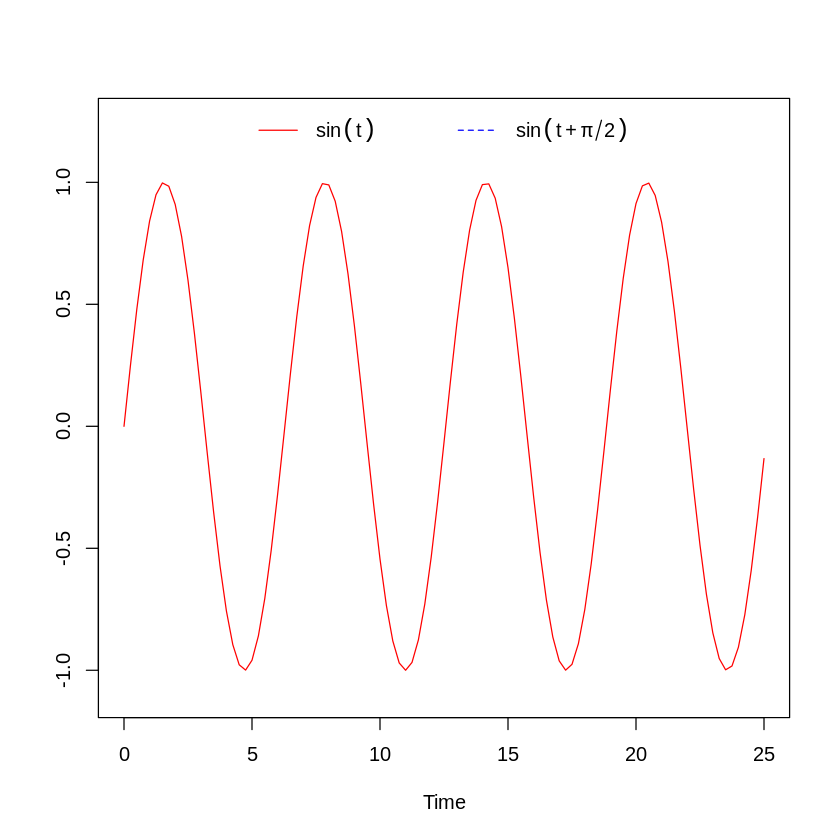

In [ ]:
# Create a sequence to 100 and scale values to (0, 25)
t <- c(0:100)
t <- t * 25/100

# Define the time series
Yt1 <- sin(t)

# Plot our time series
plot(
  t, 
  Yt1, 
  ylim = c(-1.1, 1.25), 
  type = "l", 
  col = "red", 
  lwd = 1, 
  lty = 1, 
  xlab = "Time", 
  ylab = NA
)

legend(
  "top", 
  inset=0.01, 
  col=c("red","blue"), 
  lty=c(1,2), 
  lwd=c(1,1), 
  legend = c(
    expression(sin(t)),
    expression(sin(t+pi/2))), 
  bg="white",
  box.col="white",
  horiz=TRUE
)

## X - See Also
- [Google Colab - Quick Guide](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)
- [History and Overview of R](https://bookdown.org/rdpeng/rprogdatascience/history-and-overview-of-r.html) by Roger Peng 
- [R Nuts and Bolts](https://bookdown.org/rdpeng/rprogdatascience/r-nuts-and-bolts.html) by Roger Peng
